1) Load in the dataset `https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv` into a pandas dataframe

In [47]:
# read data into a dataframe
import pandas as pd
import seaborn
df = pd.read_csv('https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv', index_col=0)
df.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


2) Convert `default` and `student` to categorical variables.

In [48]:
# convert default 
def get_default(default):
    if default.find("No")>-1:
        return 0
    else:
        return 1
df_2 = df['default'].apply(lambda default : get_default(default))

# convert student
def get_student(student):
    if student.find("No")>-1:
        return 0
    else:
        return 1
df_3 = df['student'].apply(lambda student : get_student(student))

df_4 = pd.concat([df[['balance','income']],df_2,df_3],axis=1)
#df_4.columns = ['default_old', 'student_old','balance','income','default','student']
df_4.head()

,balance,income,default,student
1,729.526495,44361.625074,0,0
2,817.180407,12106.134700,0,1
3,1073.549164,31767.138947,0,0
4,529.250605,35704.493935,0,0
5,785.655883,38463.495879,0,0


In [49]:
df_final = df[['balance','income']]
df_final.head()

,balance,income
1,729.526495,44361.625074
2,817.180407,12106.134700
3,1073.549164,31767.138947
4,529.250605,35704.493935
5,785.655883,38463.495879


3) Make boxplots of all of the variables and a scatter plot of of (balance,income) with the color
of the outcome of `default` labeled red if yes and blue if no. 

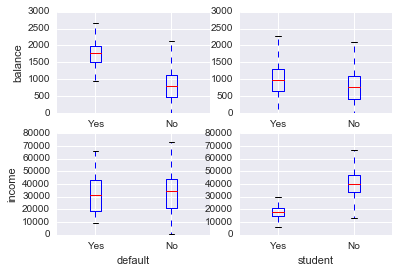

In [50]:
import pylab as plt
pd.set_option('display.max_columns', 1000)
%matplotlib inline

f,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2)
ax1.boxplot([df_4.balance[df_4.default == 1],df_4.balance[df_4.default == 0]])
ax1.set_xticklabels(('Yes', 'No'))
ax1.set_ylabel('balance')

ax2.boxplot([df_4.balance[df_4.student == 1],df_4.balance[df_4.student == 0]])
ax2.set_xticklabels(('Yes', 'No'))

ax3.boxplot([df_4.income[df_4.default == 1],df_4.income[df_4.default == 0]])
ax3.set_xticklabels(('Yes', 'No'))
ax3.set_xlabel('default')
ax3.set_ylabel('income')

ax4.boxplot([df_4.income[df_4.student == 1],df_4.income[df_4.student == 0]])
ax4.set_xticklabels(('Yes', 'No'))
ax4.set_xlabel('student')

plt.show()

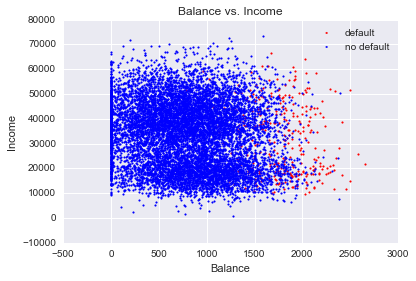

In [51]:
colors = ("blue", "red")
df_default = df_4[df_4['default']==1]
df_nodefault = df_4[df_4['default']==0]
plt.scatter(df_default['balance'],df_default['income'],color='red',marker = 'o', s = 3, label='default')
plt.scatter(df_nodefault['balance'],df_nodefault['income'],color='blue',marker = 'o',s = 3, label='no default')
plt.title('Balance vs. Income')
plt.xlabel('Balance')
plt.ylabel('Income')
plt.legend()
plt.show()

4) Train a model to predict if a student defaults on their loan or not using LogisticRegression based soley
on the `balance` and `income` variables. Plot the decision boundary in the scatter plot you made in 3) and compute the AUC ROC.

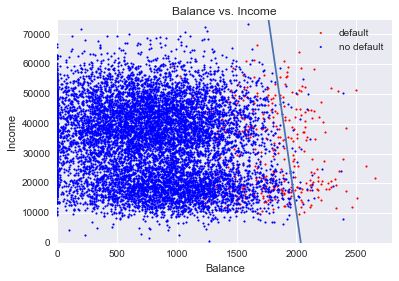

In [54]:
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
import re
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd

# Scatterplot with decision boundary
df_default = df_4[df_4['default']==1]
df_nodefault = df_4[df_4['default']==0]
plt.scatter(df_default['balance'],df_default['income'],color='red',marker = 'o', s = 3, label='default')
plt.scatter(df_nodefault['balance'],df_nodefault['income'],color='blue',marker = 'o',s = 3, label='no default')
plt.title('Balance vs. Income')
plt.xlabel('Balance')
plt.ylabel('Income')

X = df_final
y = df_2
n_samples, n_features = X.shape
half = int(n_samples/1.2)
X_train, X_test = X[:half], X[half:]
y_train, y_test = y[:half], y[half:]

#Logistic regression
lreg = LogisticRegression(penalty='l1')
lreg.fit(X_train, y_train)
b = lreg.intercept_
a = lreg.coef_[0]
plt.xlim(0,2800)
plt.ylim(0,75000)
xmin = 0
xmax = 2800
x = np.arange(xmin, xmax, 1)
y = (a[0]*x)/-a[1] + b/-a[1]
plt.plot(x, y)
plt.legend()
plt.show()

Area under the ROC curve : 0.960949


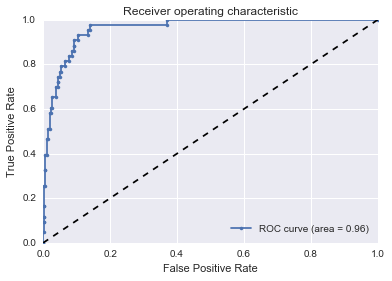

In [38]:
X = df_final
y = df_2

#Standardization 
scaler = StandardScaler()
X = X.as_matrix().astype(np.float)
X = scaler.fit_transform(X)

# Computes the AUC ROC of the classifier.
def generate_auc(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    random_state = np.random.RandomState(0)
    # Construct training and testing set.
    X, y = shuffle(X, y, random_state=random_state)
    n_samples, n_features = X.shape
    half = int(n_samples/1.2)
    X_train, X_test = X[:half], X[half:]
    y_train, y_test = y[:half], y[half:]
    
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print("Area under the ROC curve : %f" % roc_auc)
    return fpr, tpr, roc_auc, thresholds

# Generate ROC  for LR with l1 penalty and C=0.1
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,LogisticRegression,C=0.1,penalty='l1')
def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

5) Repeat 4) but with the student variable included. Optimize using Ridge regression and plot the ranking
of coefficients.  How does performance improve with the added variable?

Area under the ROC curve : 0.962152


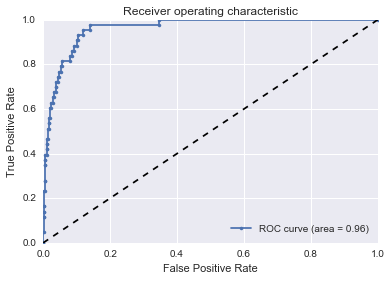

In [39]:
# Adding student variable 
X = pd.concat([df[['balance','income']],df_3],axis=1)
y = df_2

# Standardization
scaler = StandardScaler()
X = X.as_matrix().astype(np.float)
X = scaler.fit_transform(X)

# Computes the AUC ROC of the classifier.
def generate_auc(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    random_state = np.random.RandomState(0)
    # Construct training and testing set.
    X, y = shuffle(X, y, random_state=random_state)
    n_samples, n_features = X.shape
    half = int(n_samples/1.2)
    X_train, X_test = X[:half], X[half:]
    y_train, y_test = y[:half], y[half:]
    
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print("Area under the ROC curve : %f" % roc_auc)
    return fpr, tpr, roc_auc, thresholds

# Generate ROC  for LR with l1 penalty and C=0.1
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,LogisticRegression,C=0.1,penalty='l1')
def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

In [15]:
#Adding L1 constraint 
df_4 = pd.concat([df[['balance','income']],df_3],axis=1)
df_4.head()

,balance,income,student
1,729.526495,44361.625074,0
2,817.180407,12106.134700,1
3,1073.549164,31767.138947,0
4,529.250605,35704.493935,0
5,785.655883,38463.495879,0


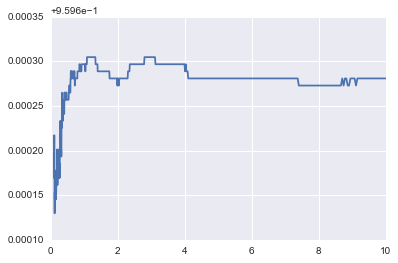

In [19]:
from sklearn.model_selection import train_test_split

X = df_4
y = df_2

# Standardization
X = np.array(X.values)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# L1 Regularization
scores = []
random_state = np.random.RandomState(0)
X, y = shuffle(X, y, random_state=random_state)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
alphas = np.logspace(-1,1,1000)
for alpha in alphas:
    regr = LogisticRegression(penalty='l1',C=alpha)
    probas_ = regr.fit(X_train, y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    scores.append(roc_auc)
plt.plot(alphas,scores)

In [20]:
regr.score(X_test,y_test)

0.97550000000000003

In [26]:
alpha_best = alphas[np.argmax(scores)]
print('The optimal regularization parameter is %0.8f' %alpha_best)

The optimal regularization parameter is 1.08401436


coeff values:  [ 2.69032106  0.         -0.32781857]


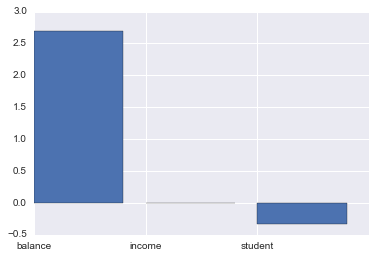

In [23]:
lreg = LogisticRegression(C = alpha_best, penalty = 'l1')
lreg.fit(X_train, y_train)

index = np.arange(len(lreg.coef_[0]))

plt.bar(index, lreg.coef_[0])
plt.xticks(index, ("balance", "income", "student"))
print("coeff values: ", lreg.coef_[0])

plt.show()

The performance barely improved by adding the "student" variable. The AUCROC improved slightly from 0.960949 to 0.962152. As the regularization showed, the "student" regularization coefficient is not significant in comparison to the "balance" regularization coefficient. Thus, the "student" variable is not a critical predictive feature for this model. 

6) Using cross validation, check that the model you built in 5) is robust (generalizes to other random folds of the dataset).

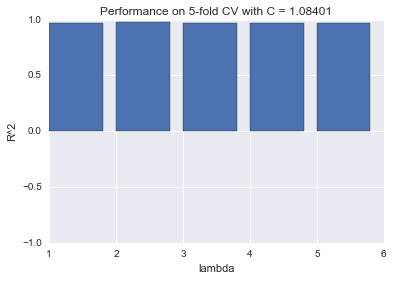

In [30]:
from sklearn.model_selection import cross_val_score

lreg = LogisticRegression(C=alpha_best, penalty='l1')
scores = cross_val_score(lreg, X, y, cv=5)

plt.ylim([-1,1])
plt.xlabel('lambda')
plt.ylabel('R^2')
plt.bar(range(1,6), scores)
plt.title('Performance on 5-fold CV with C = %0.5f' %alpha_best)
plt.show()

The logistic regression model with the optimal L1 regularization parameter performed well using a five-fold cross validation since the R^2 was consistently near 1 across the random folds of the dataset (as shown in the plot above). 

7) Train a Decision Tree classifier with maximum depth 5 and plot the decision tree. How does performance compare?

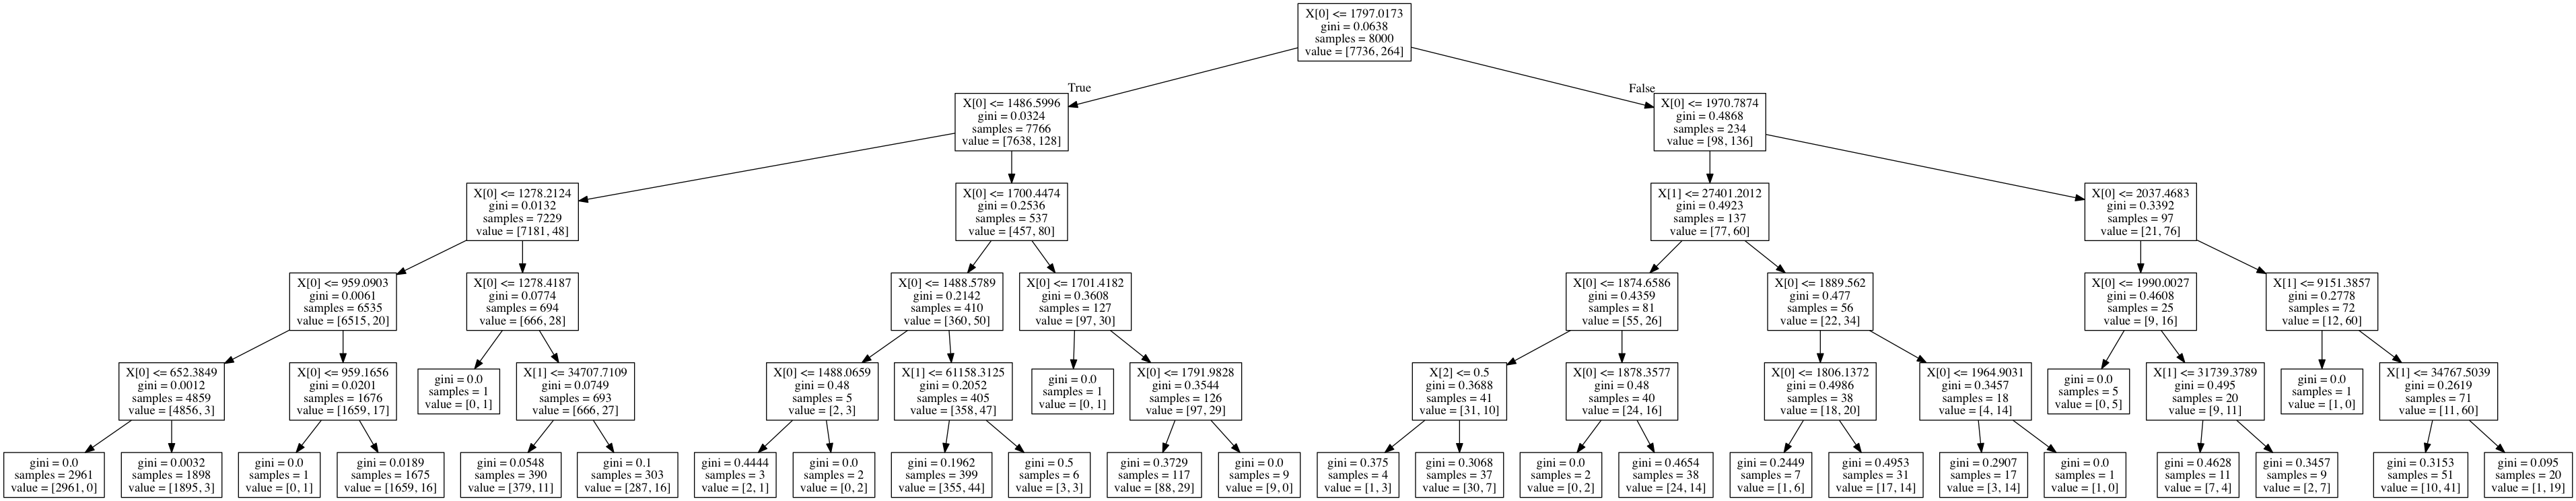

In [35]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as nprnd
import random
import pydotplus
%matplotlib inline

X = df_4
y = df_2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

class_2 = DecisionTreeClassifier(max_depth=5)
class_2.fit(X_train, y_train)

dot_data=export_graphviz(class_2, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

In [37]:
class_2.score(X_test, y_test)

0.96899999999999997

Compared to the optimal logistic regression model, which performed with regression score of 0.9755, the decision tree classifier model performs worse with score of 0.96899. However, the scores are quite similar and the decision tree classifier model has not been optimized. 

8) Find the optimal decision tree depth and compute the AUC ROC. 

The optimal decision tree depth is 5.000000


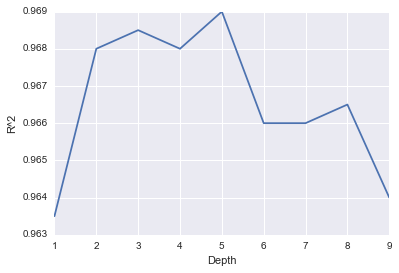

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
train_errors=[]
test_errors=[]
scores=[]
depths = range(1,10)
for n in depths:
    regr = DecisionTreeClassifier(max_depth=n)
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    train_errors.append(regr.score(X_train,y_train))
    scores.append(regr.score(X_test,y_test))
plt.ylabel('R^2')
plt.xlabel('Depth')
plt.plot(depths,scores)
test_errors=scores
n_opt=depths[np.argmax(scores)]
print('The optimal decision tree depth is %f' %n_opt)

Area under the ROC curve : 0.932280


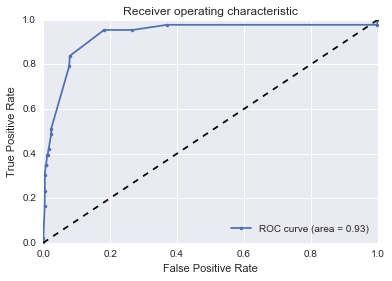

In [44]:
def generate_auc(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    random_state = np.random.RandomState(0)
    # Construct training and testing set.
    X, y = shuffle(X, y, random_state=random_state)
    n_samples, n_features = X.shape
    half = int(n_samples/1.2)
    X_train, X_test = X[:half], X[half:]
    y_train, y_test = y[:half], y[half:]
    
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print("Area under the ROC curve : %f" % roc_auc)
    return fpr, tpr, roc_auc, thresholds

def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

fpr,tpr,roc_auc, thresholds = generate_auc(X,y,DecisionTreeClassifier,max_depth = n_opt)
generate_ROCplot(fpr,tpr,'LR',roc_auc)